# Assignment

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
file_dirs = "/content/drive/MyDrive/Colab Notebooks/Data visual/Day14/Tugas"
os.chdir(file_dirs)

In [ ]:
!ls

'Homework Template.ipynb'   house_prices.csv


In [6]:
df = pd.read_csv('house_prices.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 1.&nbsp; Count of one categorical feature

Visual

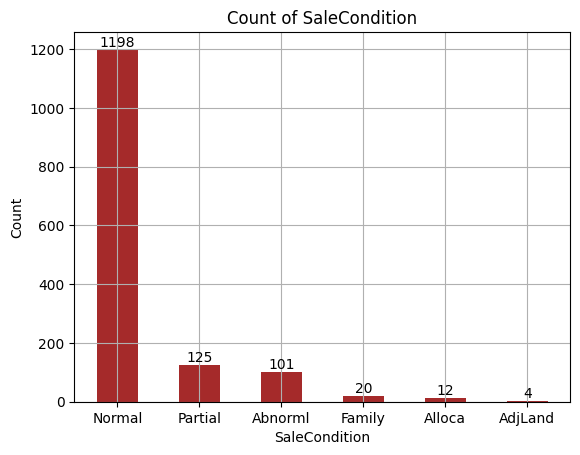

In [ ]:
#Matpotlib
SaleCondition_counts = df['SaleCondition'].value_counts()
plt.bar( SaleCondition_counts.index, SaleCondition_counts, width=0.5,color='brown', linewidth=2)
plt.xlabel('SaleCondition')
plt.ylabel('Count')
plt.title('Count of SaleCondition')
#grid dan skala
plt.grid(True)

for i, count in enumerate(SaleCondition_counts):
    plt.text(SaleCondition_counts.index[i], count, str(count), ha='center', va='bottom')

Analisis

Jumlah tertinggi pada penjualan rumah adalah dalam kondisi normal dengan total 1198 unit terjual, dilanjutkan 125 unit partial, 101 unit abnormal, 20 unit family, 12 unit alloca, dan yg terakhit 4 unit adjland

# 2.&nbsp; Distribution of one continuous feature

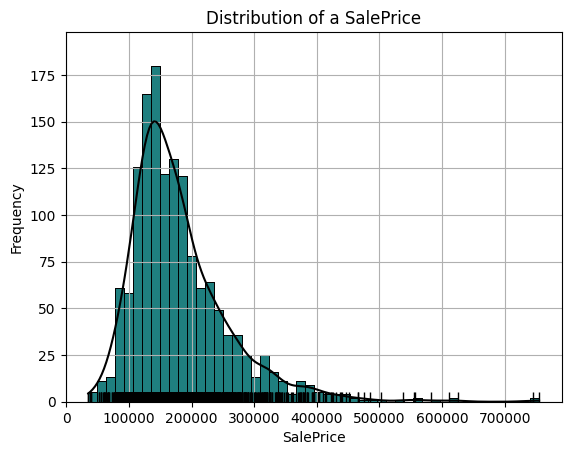

In [16]:
sns.set_palette('colorblind')
sns.histplot(df['SalePrice'], bins=50, color='cyan' )
sns.histplot(df['SalePrice'], bins=50, kde=True, color='black',)
sns.rugplot(df['SalePrice'], color='black')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of a SalePrice')
plt.grid(True)
plt.show()

Analisa

Terdapata 3 puncak pada distribusinya dan yang tertinggi di sekitar harga jual 150000. Terdapat outlayer dengan harga yang sangat tinggi sehingga posisi distribusi disebelah kiri condong ke kanan.


# 3.&nbsp; Categorical-continuous

In [ ]:
df['SaleCondition'].drop_duplicates()

0       Normal
3      Abnorml
11     Partial
39     AdjLand
102     Alloca
137     Family
Name: SaleCondition, dtype: object

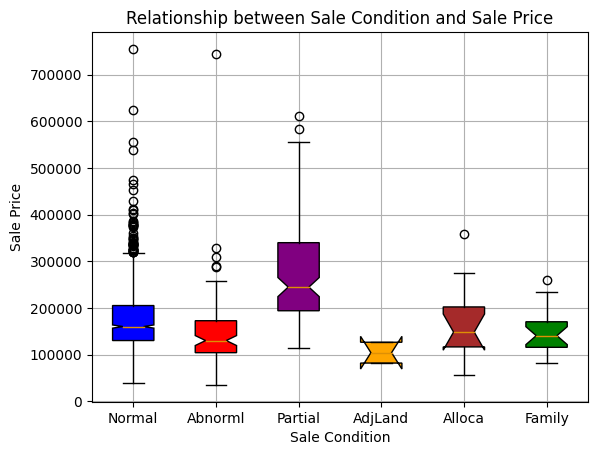

In [113]:
#sale condition dan saleprice
box1=plt.boxplot([df[df['SaleCondition'] == 'Normal']['SalePrice'],
             df[df['SaleCondition'] == 'Abnorml']['SalePrice'],
             df[df['SaleCondition'] == 'Partial']['SalePrice'],
            df[df['SaleCondition'] == 'AdjLand']['SalePrice'],
            df[df['SaleCondition'] == 'Alloca']['SalePrice'],
            df[df['SaleCondition'] == 'Family']['SalePrice']],
            labels=['Normal', 'Abnorml', 'Partial','AdjLand','Alloca','Family'],
            notch=True,vert=True,patch_artist=True)

colors= ['blue', 'red', 'purple', 'orange', 'brown', 'green']
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
plt.grid(True)
plt.xlabel('Sale Condition')
plt.ylabel('Sale Price')
plt.title('Relationship between Sale Condition and Sale Price')
plt.show()

Analisis


1.   Normal:
*   Terdapat banyak outlayer dan terdapat outlayer paling besar
*   Skewness paling tajam (Distribusi data memiliki ekor panjang sebelah kanan)

2.   Abnorml:
*   Terdapat beberapa outlayer dan satu outlayer sangat besar
*   Skewness tajam/garis median cenderung kebawah

3.   Partial:
*   Memiliki variasi terbesar
*   Terdapat dua outlayer

4.   AdjLand:
*   Memiliki variasi terkecil
*   Simetri (median di tengah kotak/distribusi simetris)

5.   Alloca:
*   Skewness paling landai (Distribusi data memiliki ekor panjang disebelah kiri)
*   Terdapat satu outlayer

6.   Family
*   Terdapat satu outlayer
*   Garis median mendekati tengah (distribusi hampir mendekati simetris)





# 4.&nbsp; Continuous-continuous

Visual

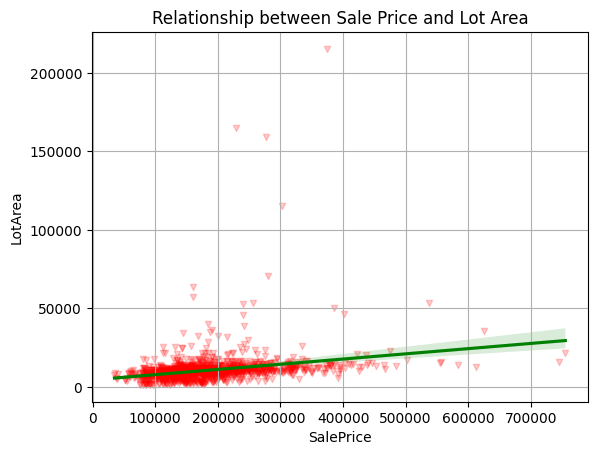

In [27]:
sns.regplot(
    y=df['LotArea'], x=df['SalePrice'],
    marker='v',
    scatter_kws={"s": 20,"alpha": 0.2,"color":"red"}, #visibile
    line_kws={"color":"green"}
);
plt.grid(True)
plt.ylabel('LotArea')
plt.xlabel('SalePrice')
plt.title('Relationship between Sale Price and Lot Area')
plt.show()

Analisis

*   Terdapat korelasi hubungan positif antara 2 variabel
*   Titik titik berkumpul didekat garis berarti terdapat hubungan yang sangat kuat antara 2 variable
*   Terdapat beberapa outlayer yang menyimpang jauh (hal ini kemungkinan disebabkan karena lokasi tanah yang luas berada di lokasi kurang strategis)
*   Terdapat kerapatan data pada luas tana dibawah 50000 dengan harga sekitar 100000-300000



